In [1]:
from neuron import h, gui
import bokeh as bk
import bokeh.plotting as bkp
import matplotlib.pyplot as plt
import numpy as np
from bokeh.palettes import Dark2_5 as palette
import itertools 

%matplotlib inline
bkp.output_notebook()

Loading BokehJS ...

In [2]:
def soma_vclamp(soma):
    vclamp = h.VClamp(soma(0.5))

    vclamp.dur[0]= 50
    vclamp.dur[1] =  100
    vclamp.dur[2] =  50

    v0 = -80.
    dV = 40.
    numSteps = 5

    vclamp.amp[0] = -70
    vclamp.amp[2] = -70
    for j in range(numSteps):
        vclamp.amp[1] = v0 + dV*j
        
        t_vec = h.Vector()
        v_vec = h.Vector()
        i_vec = h.Vector()
        
        t_vec.record(h._ref_t)
        v_vec.record(soma(.5)._ref_v)
        i_vec.record(vclamp._ref_i)

        h.tstop=200
        h.run()

        #i_membrane = (i_pas_vec.as_numpy() + i_cap_vec.as_numpy())*1000 #pA
        v = v_vec.as_numpy()
        i = i_vec.as_numpy()
        if j == 0:
            I_membrane =  np.zeros([numSteps, i.size])
            V = np.zeros([numSteps, i.size])
        I_membrane[j,:] = i_vec
        V[j,:]=v
    return t_vec.as_numpy(), I_membrane

def soma_iclamp(soma):
    iclamp = h.IClamp(soma(0.5))
    iclamp.dur= 300
    iclamp.delay = 50
    i0 = -.05
    dI = .01
    numSteps = 10

    for i in range(numSteps):


        iclamp.amp = i0 + dI*i


        
        t_vec = h.Vector()
        v_vec = h.Vector()

        t_vec.record(h._ref_t)
        v_vec.record(soma(.5)._ref_v)

        h.tstop=500
        h.run()

        
        v = v_vec.as_numpy()
        if i == 0:
            #I_membrane =  np.zeros([numSteps, i_membrane.size])
            V = np.zeros([numSteps, v.size])
        #I_membrane[i,:] = i_membrane
        V[i,:]=v
    return t_vec.as_numpy(),V

In [9]:
soma = h.Section(name='soma')
soma.L=12
soma.diam = 7
Rm = 2800
soma.cm = 1  
soma.Ra = 150
Vrest = -65.
gna = .032
gkdr = .003
celsius = 34.0  
KMULT =  0# 0.008
KMULTP = 0#0.008
ghd=.0006

soma.insert('pas')
soma.g_pas, soma.e_pas = 1/Rm, Vrest

soma.insert('hd')
soma.ghdbar_hd = ghd
soma.vhalfl_hd=-82

soma.insert('na3')
soma.gbar_na3 = gna
soma.ar2_na3 - 1

soma.insert('kdr')
soma.gkdrbar_kdr = gkdr

soma.insert('kap')
soma.gkabar_kap = KMULTP

t,V = soma_iclamp(soma)

#print(V.shape)
#plt.plot(V[:,1000:].T)
#plt.show()

f= bkp.figure()

colors = itertools.cycle(palette)  
#for m, color in itertools.izip(xrange(10), colors):
for j, color in zip(np.arange(V.shape[0]),colors):
    f.line(t[1000::5],V[j,1000::5].T,color=color)
    
bkp.show(f)




In [5]:
soma = h.Section(name='soma')
soma.L=12
soma.diam = 7
Rm = 2800
soma.cm = 1  
soma.Ra = 150
Vrest = -65.
gna = .032
gkdr = .003
celsius = 34.0  
KMULT =  0.008
KMULTP = 0.008
ghd=.0006

soma.insert('pas')
soma.g_pas, soma.e_pas = 1/Rm, Vrest

soma.insert('hd')
soma.ghdbar_hd = ghd
soma.vhalfl_hd=-82

soma.insert('na3')
soma.gbar_na3 = gna
soma.ar2_na3 - 1

soma.insert('kdr')
soma.gkdrbar_kdr = gkdr

soma.insert('kap')
soma.gkabar_kap = KMULTP

t,I = soma_vclamp(soma)

#print(I.shape)
#plt.plot(I[:,1000:].T)
#plt.ylim(-3,3)
#plt.show()

f1 = bkp.figure()
colors = itertools.cycle(palette)  
#for m, color in itertools.izip(xrange(10), colors):
for j, color in zip(np.arange(I.shape[0]),colors):
    f1.line(t[1000::5],I[j,1000::5].T,color=color)
    
bkp.show(f1)



(20001, 4)
(20001, 4)
(20001, 4)
(20001, 4)
(20001, 4)
(20001, 4)
(20001, 4)
(20001, 4)
(20001, 4)
(20001, 4)


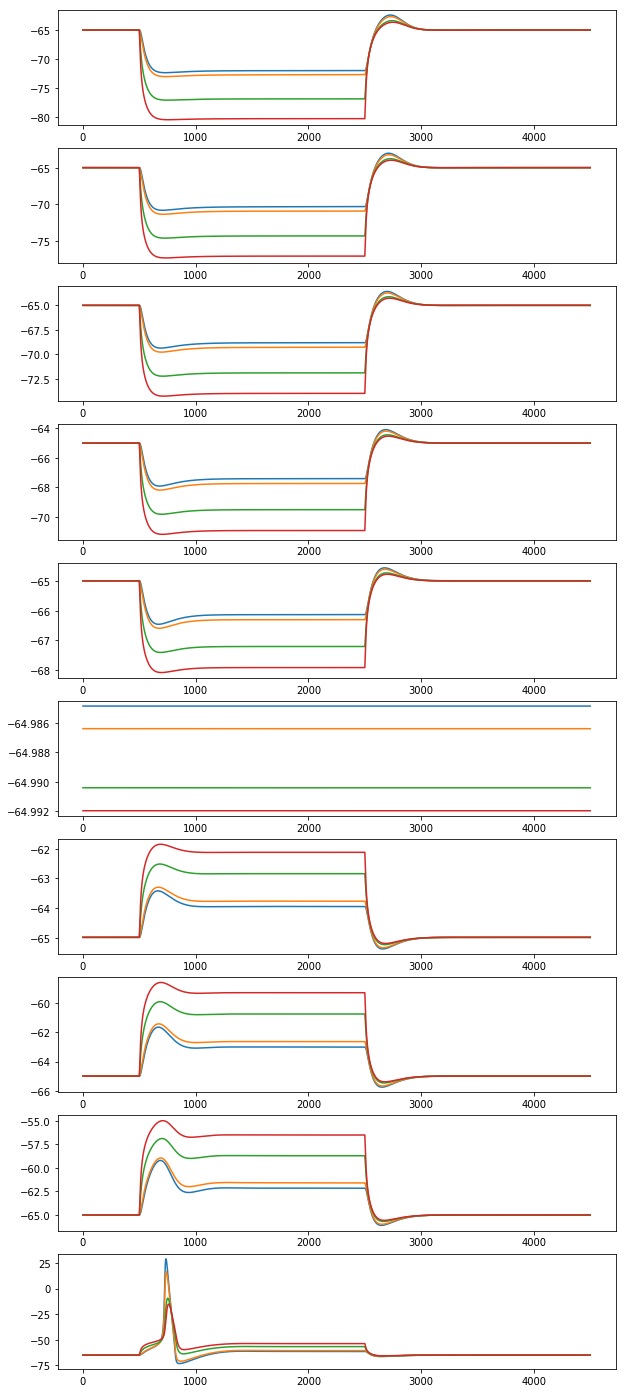

	-64.984819 


In [10]:
# ball and stick 

soma = h.Section(name='soma')
dend = h.Section(name='dend')
soma.L = soma.diam = 12.6157 # Makes a soma of 500 microns squared.
dend.L = 200 # microns
dend.diam = 1 # microns

soma.Ra = dend.Ra = 100
soma.cm = dend.cm = 1

# Insert active Hodgkin-Huxley current in the soma
soma.insert('hh')
soma.gnabar_hh = 0.12  # Sodium conductance in S/cm2
soma.gkbar_hh = 0.036  # Potassium conductance in S/cm2
soma.gl_hh = 0.0003    # Leak conductance in S/cm2
soma.el_hh = -54.3     # Reversal potential in mV

# Insert passive current in the dendrite
dend.insert('pas')
dend.g_pas = 0.001  # Passive conductance in S/cm2
dend.e_pas = -65    # Leak reversal potential mV

dend.connect(soma(1))
dend.nseg=201
stim = h.IClamp(dend(.75))

stim.dur= 50
stim.delay = 50
i0 = -.1
dI = .02
numSteps = 10

for i in range(numSteps):
    stim.amp = i0 + dI*i

    t_vec = h.Vector()
    v_st_prox = h.Vector()
    v_st_mid = h.Vector()
    v_st_dist = h.Vector()
    v_ball = h.Vector()

    t_vec.record(h._ref_t)
    v_ball.record(soma(.5)._ref_v)
    v_st_prox.record(dend(.1)._ref_v)
    v_st_mid.record(dend(.5)._ref_v)
    v_st_dist.record(dend(.9)._ref_v)

    h.tstop=500
    h.run()

        
    v_ball, v_st_prox = v_ball.as_numpy(), v_st_prox.as_numpy()
    v_st_mid, v_st_dist = v_st_mid.as_numpy(), v_st_dist.as_numpy()
    if i == 0:
        V = np.zeros([numSteps, v_ball.size,4])
    V[i,:,0]=v_ball
    V[i,:,1] = v_st_prox
    V[i,:,2] = v_st_mid
    V[i,:,3] = v_st_dist
    

f, axarray = plt.subplots(numSteps,1,figsize=(10,25))

for j in range(numSteps):
    axarray[j].plot(np.squeeze(V[j,1500:6000,:]))
    #axarray[j].plot(np.squeeze(V[j,1500:6000,2]))
    print(V[j,:,:].shape)
plt.show()

(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
	-64.985111 


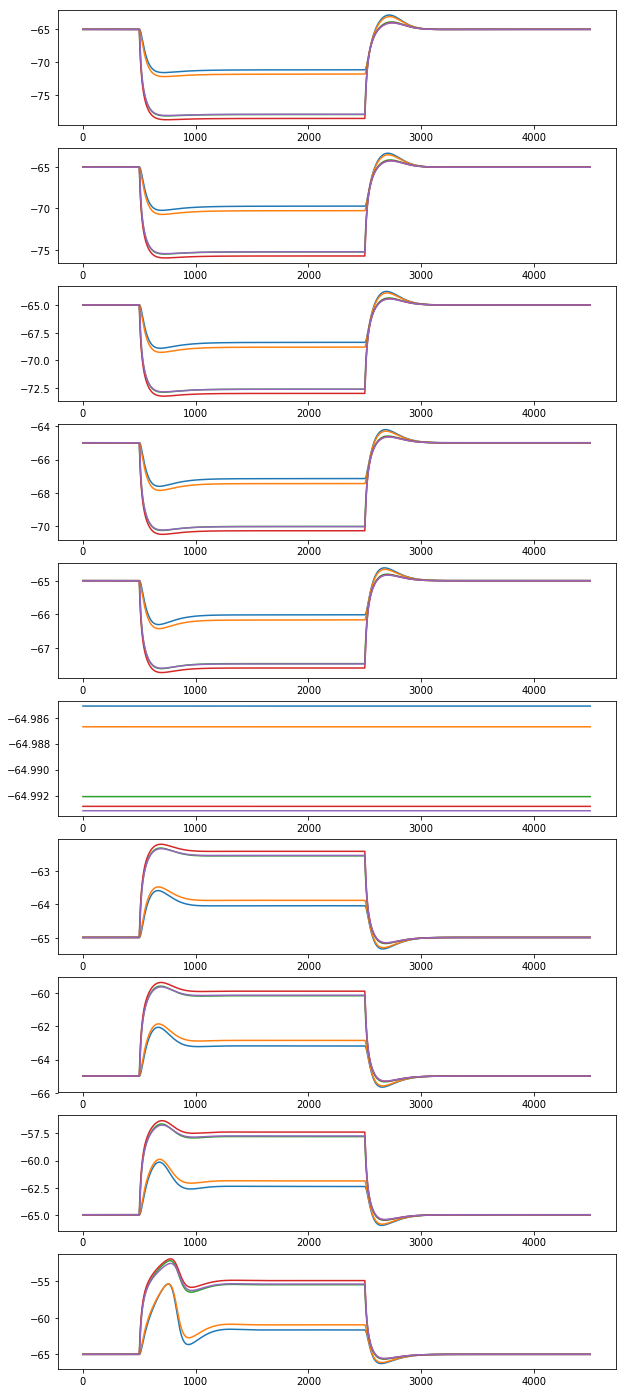

In [11]:
# 1 branch point

#soma = h.Section(name='ball')
#dend = h.Section(name='stick')
branch = h.Section(name='branch')
branch.Ra = 100
branch.cm = 1
branch.L = 50 # microns
branch.diam = .5 # microns

#dend.connect(soma(1))
branch.connect(dend(.8))


#soma.insert('hh')
branch.insert('pas')
branch.g_pas = 0.001  # Passive conductance in S/cm2
branch.e_pas = -65    # Leak reversal potential mV
branch.nseg = 101




for i in range(numSteps):
    stim.amp = i0 + dI*i

    t_vec = h.Vector()
    
    v_ap_prox = h.Vector()
    v_ap_bp = h.Vector() # branch point
    v_ap_dist = h.Vector()
    
    v_br_mp = h.Vector() # branch midpoint
    
    v_soma = h.Vector()
    

    t_vec.record(h._ref_t)
    v_soma.record(soma(.5)._ref_v)
    
    v_ap_prox.record(dend(.1)._ref_v)
    v_ap_bp.record(dend(.67)._ref_v)
    v_ap_dist.record(dend(.9)._ref_v)
    
    v_br_mp.record(branch(.5)._ref_v)

    h.tstop=500
    h.run()

        
    v_soma, v_ap_prox = v_soma.as_numpy(), v_ap_prox.as_numpy()
    v_ap_bp, v_ap_dist = v_ap_bp.as_numpy(), v_ap_dist.as_numpy()
    v_br_mp = v_br_mp.as_numpy()
    if i == 0:
        V = np.zeros([numSteps, v_ball.size,5])
    V[i,:,0]=v_soma
    V[i,:,1] = v_ap_prox
    V[i,:,2] = v_ap_bp
    V[i,:,3] = v_ap_dist
    V[i,:,4] = v_br_mp
    

f, axarray = plt.subplots(numSteps,1,figsize=(10,25))

for j in range(numSteps):
    axarray[j].plot(np.squeeze(V[j,1500:6000,:]))
    #axarray[j].plot(np.squeeze(V[j,1500:6000,2]))
    print(V[j,:,:].shape)
plt.show()


(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)
(20001, 5)


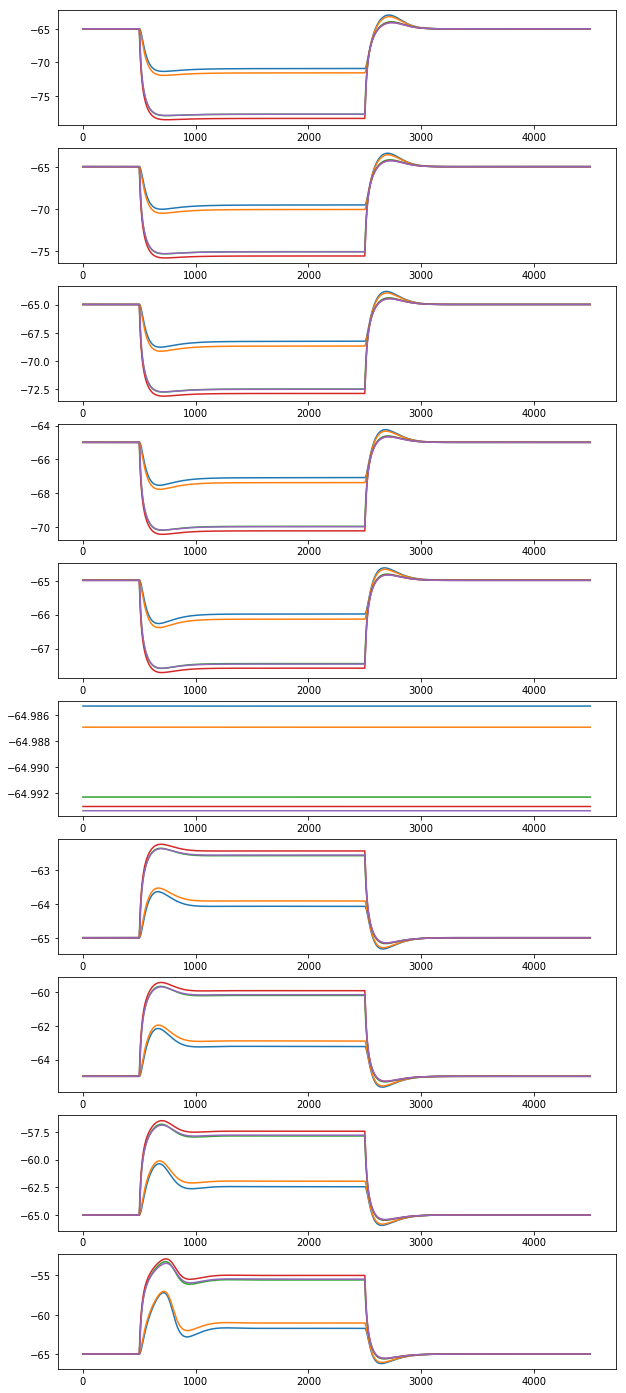

In [6]:
# 2 branch points

branch2 = h.Section(name='branch2')
branch2.connect(dend(.33))
branch2.Ra = 100
branch2.cm = 1
branch2.L = 50
branch2.diam=.2

branch2.insert('pas')
branch2.g_pas = 0.001  # Passive conductance in S/cm2
branch2.e_pas = -65    # Leak reversal potential mV
branch2.nseg = 101


for i in range(numSteps):
    stim.amp = i0 + dI*i

    t_vec = h.Vector()
    
    v_ap_prox = h.Vector()
    v_ap_bp = h.Vector() # branch point
    v_ap_dist = h.Vector()
    
    v_br_mp = h.Vector() # branch midpoint
    
    v_soma = h.Vector()
    

    t_vec.record(h._ref_t)
    v_soma.record(soma(.5)._ref_v)
    
    v_ap_prox.record(dend(.1)._ref_v)
    v_ap_bp.record(dend(.67)._ref_v)
    v_ap_dist.record(dend(.9)._ref_v)
    
    v_br_mp.record(branch(.5)._ref_v)

    h.tstop=500
    h.run()

        
    v_soma, v_ap_prox = v_soma.as_numpy(), v_ap_prox.as_numpy()
    v_ap_bp, v_ap_dist = v_ap_bp.as_numpy(), v_ap_dist.as_numpy()
    v_br_mp = v_br_mp.as_numpy()
    if i == 0:
        V = np.zeros([numSteps, v_ball.size,5])
    V[i,:,0]=v_soma
    V[i,:,1] = v_ap_prox
    V[i,:,2] = v_ap_bp
    V[i,:,3] = v_ap_dist
    V[i,:,4] = v_br_mp
    

f, axarray = plt.subplots(numSteps,1,figsize=(10,25))

for j in range(numSteps):
    axarray[j].plot(np.squeeze(V[j,1500:6000,:]))
    #axarray[j].plot(np.squeeze(V[j,1500:6000,2]))
    print(V[j,:,:].shape)
plt.show()

In [ ]:
# full CA1 reconstructions

In [7]:
shape_window = h.PlotShape()
shape_window.exec_menu('Show Diam')

0.0

Changed dt
